# Geographic wine data

## Libraries and settings

In [2]:
# Libraries
import os
import requests
import json
import urllib
import fnmatch
import folium
import pandas as pd
from IPython.display import clear_output
import matplotlib.pyplot as plt


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Get current working directory
print(os.getcwd())

/workspaces/wine_analysis/notebooks


### Importing wine data

In [3]:
# Get current working directory
print(os.getcwd())

# Show all files in the directory
flist = fnmatch.filter(os.listdir('.'), '*.csv')
for i in flist:
    print(i)

# Read the data to a pandas data frame
df = pd.read_csv('/workspaces/wine_analysis/data/enriched/wine_data_enriched.csv', 
                 sep=',', 
                 encoding='utf-8')[['web-scraper-order', 
                                    'price_per_10cl', 
                                    'bio',
                                    'wine_category', 
                                    'non_alcoholic', 
                                    'premium',
                                    'country',
                                    'longitude',
                                    'latitude']]

# Get number of rows and columns
print(df.shape)

# Show first records
df.head(10)

/workspaces/wine_analysis/notebooks
(540, 9)


,web-scraper-order,price_per_10cl,bio,wine_category,non_alcoholic,premium,country,longitude,latitude
0,1734709733-1,1.59,1,SCHAUMWEIN,0,0,Italien,12.567380,41.871940
1,1734709733-3,1.69,0,WEISSWEIN,0,1,Schweiz,8.227512,46.818188
2,1734709733-4,1.46,0,SCHAUMWEIN,0,1,Italien,12.567380,41.871940
3,1734709733-5,3.21,0,UNCATEGORIZED,0,0,Schweiz,8.227512,46.818188
4,1734709733-6,2.60,0,SCHAUMWEIN,0,0,Frankreich,2.213749,46.227638
5,1734709733-7,0.93,0,SCHAUMWEIN,0,0,Italien,12.567380,41.871940
6,1734709733-8,1.33,0,WEISSWEIN,0,0,Schweiz,8.227512,46.818188
7,1734709733-9,0.73,0,SCHAUMWEIN,0,0,Italien,12.567380,41.871940
8,1734709733-10,1.73,0,ROTWEIN,0,0,Italien,12.567380,41.871940
9,1734709733-11,1.86,0,ROTWEIN,0,0,Italien,12.567380,41.871940


### Wine distribution by countries

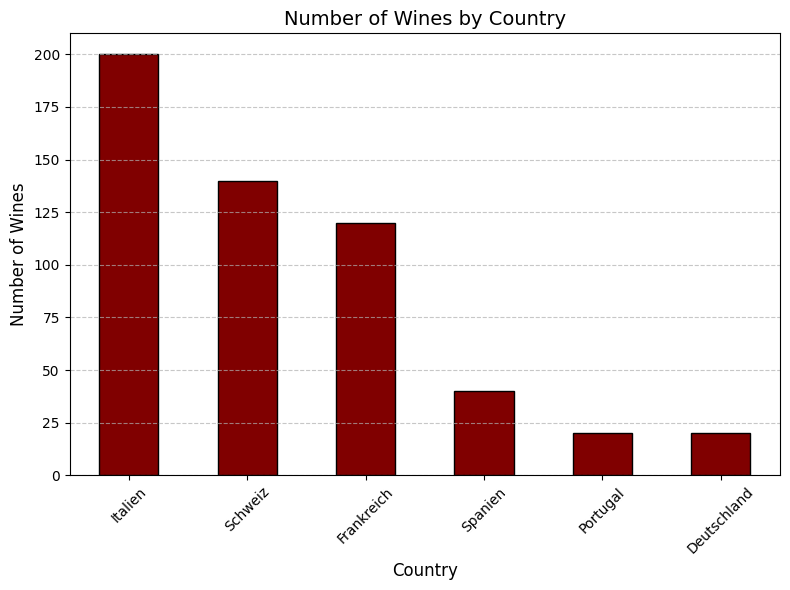

In [4]:
# Group by 'country' and count the number of wines
country_counts = df['country'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
country_counts.plot(kind='bar', color='maroon', edgecolor='black')

# Add labels and title
plt.title('Number of Wines by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Wines', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Plot countries on map

In [5]:
# Initialisierung der Map
m = folium.Map(location=[47.44, 8.65], zoom_start=4)

# Add lat/lon of addresses
df_sub = df.dropna()
for i in range(0, len(df_sub)):
    folium.Marker(location=(df_sub.iloc[i]['latitude'], 
                            df_sub.iloc[i]['longitude']), 
                    popup=df_sub.iloc[i]['wine_category']).add_to(m)

# Layer control
folium.LayerControl().add_to(m)

# Plot map
m